Universidade do Vale do Itajaí<br>
Escola Politécnica<br>
Processamento Digital de Sinais: Imagens

# Prática com Operações Pontuais e OpenCV

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Conversão de imagem RGB em imagem Grayscale

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow


In [21]:
#abria a imagem
img = cv2.imread('../PDI/Images/shiba.jpg',1)
#cv2_imshow(img)

In [22]:
#mostrando a imagem colorida
cv2.imshow('in', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
#aplicando conversão básica
#numpy

img_grayscale_basic_np = (img[ : , : ,0]+ img[:, :, 1] + img[:, :, 2])/3

#cv2
B, G, R = cv2.split(img)
img_grayscale_basic_cv2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_grayscale_basic = np.array(img_grayscale_basic_cv2, dtype=np.uint8)

#No PC usar a seguinte forma de plotagem, para o Colab usar cv2_imshow(img)
cv2.imshow('img_grayscale_basic', img_grayscale_basic_cv2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
#aplicando conversão ponderada
weight_B = 0.11
weight_G = 0.59
weight_R = 0.3

img_grayscale_pondered_np = weight_B*img[ : , : ,0] + weight_G*img[ : , : ,1] + weight_R*img[ : , : ,2]

#cv2
B, G, R = cv2.split(img)
img_grayscale_pondered_cv2 = weight_B * B + weight_G * G + weight_R * R

img_grayscale_pondered = np.array(img_grayscale_pondered_np, np.uint8)

#No PC usar a seguinte forma de plotagem, para o Colab usar cv2_imshow(img)
cv2.imshow('img_grayscale_basic_pondered', img_grayscale_pondered)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Histograma de uma imagem

Fazer o histograma de uma imagem

In [23]:
img_zero = cv2.imread("../PDI/Images/shiba.jpg", 0)

histogram = np.zeros(256)
for pixel in img_zero.ravel():
    histogram[pixel] += 1

total_pixels = img.size

print(total_pixels)


1447200


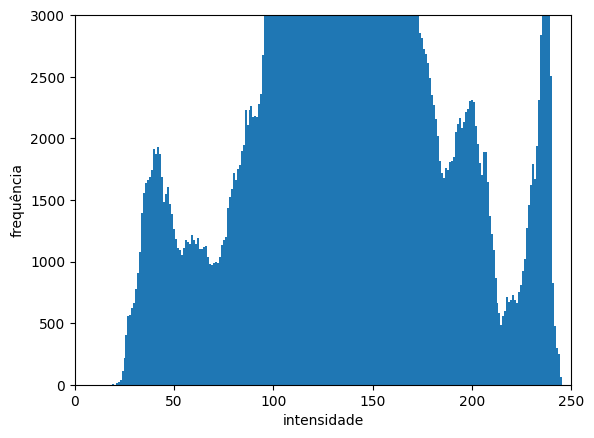

In [24]:
x = np.linspace(0, 255, 256)
plt.bar(x, histogram, width=1)
plt.xlabel('intensidade');
plt.ylabel('frequência');
plt.ylim(0, 3000)
plt.xlim(0, 250)
plt.show()

Agora faça o histograma normalizado

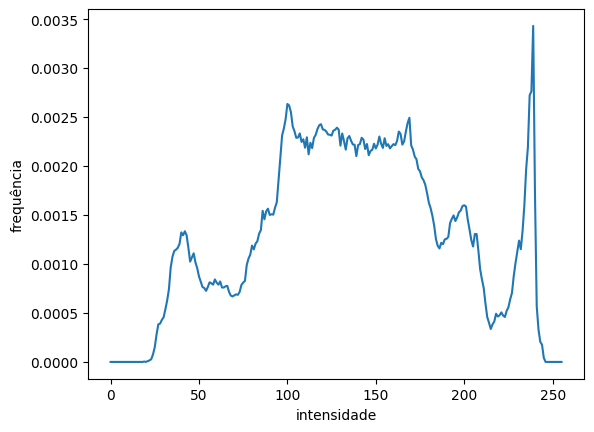

In [25]:
histogram_normalized = histogram/total_pixels

x = np.linspace(0, 255, 256)
plt.plot(x, histogram_normalized)
plt.xlabel('intensidade');
plt.ylabel('frequência');
plt.show()

## Transformações

Aplicar o conceito de transformação negativa em uma imagem. Cuide da questão de haver 3 bandas.

In [27]:
#negativo

img_in = cv2.imread("..//PDI/Images/shiba.jpg", 1)

img_negative_np = np.zeros_like(img_in)
for color in range(3):
    img_negative_np[:,:,color] = 255 - img_in[:, :, color]

img_out = 255 - img_in #necessario fazer um cast para exibir

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicar o conceito de transformação logaritimica em uma imagem. Cuide da questão de haver 3 bandas.

In [30]:
#logaritimica 
img_in = cv2.imread("..//PDI/Images/shiba.jpg")


c = 255 / np.log(1 + np.max(img_in))


img_out = c * np.log(img_in.astype(np.uint16) + 1).astype(np.uint8) #necessario fazer um cast para exibir

img_out = np.clip(img_out, 0,255).astype(np.uint8)


print(img_out.max())
cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

229


Aplicar o conceito de transformação de gamma em uma imagem. Cuide da questão de haver 3 bandas.

In [32]:
#gamma 
img_in = cv2.imread("..//PDI/Images/shiba.jpg", 1)

c = 1
gamma = 2

img_out = np.power(img_in / 255, 1/gamma) #necessario fazer um cast para exibir
img_out = (img_out * 255).astype(np.uint8)

print(img_out.max())
cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

255


Aplicar o conceito de transformação de alargamento de contraste em uma imagem. Cuide da questão de haver 3 bandas.

In [69]:
#alargamento de contraste
img_in = cv2.imread("..//PDI/Images/shiba.jpg", 1)
a = 2

img_out = (img_in.astype(np.uint16) * a).clip(0, 255).astype(np.uint8)

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicar o conceito de transformação de contraste e brilho em uma imagem. Cuide da questão de haver 3 bandas.

In [53]:
#contraste e brilho
img_in = cv2.imread("..//PDI/Images/shiba.jpg")
a = 2
b = 10
img_out = ((img_in.astype(np.int16) * a) + b).clip(0, 255).astype(np.uint8)

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicar o conceito de transformação de limiar em uma imagem. Cuide da questão de haver 3 bandas.

In [63]:
#limiar
img_in = cv2.imread("..//PDI/Images/shiba.jpg", 0)

threshold_value = 127
# img_out = np.zeros_like(img_in, dtype=np.uint8)

# for i in range(img_in.shape[0]):
#     for j in range(img_in.shape[1]):
#         if img_in[i,j] > threshold_value:
#             img_out[i,j] = 255
#         else:
#             img_out[i,j] = 0

# img_out = ? #necessario fazer um cast para exibir

img_out = np.where(img_in > threshold_value, 255, 0).astype(np.uint8)

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()

Aplicar o conceito de transformação de limiar com fatiamento de plano em uma imagem. Cuide da questão de haver 3 bandas.

In [60]:
#limiar (com fatiamento por plano)
img_in = cv2.imread("..//PDI/Images/shiba.jpg", 0)
a = 127
b = 200
k = 255

img_out = np.where(np.logical_and(img_in > a,img_in < b), k, 0).astype(np.uint8)

# for i in range(?):
#     ?

# img_out = ? #necessario fazer um cast para exibir

cv2.imshow('in', img_in)
cv2.waitKey(0)
cv2.imshow('out', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()